In [2]:
import os
import random
import numpy as np
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from itertools import combinations 
from statsmodels.regression.linear_model import OLS
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol.to_list()

In [4]:
len(tickers)

503

In [5]:
df = yf.download(tickers, start='2020-01-01', end='2025-01-01')['Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-01-01)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


In [6]:
df

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,82.711060,72.620850,70.326836,NaN,78.555809,41.268997,192.515015,334.429993,108.940224,39.462345,...,24.016768,139.020844,52.673714,54.634781,74.769112,63.830002,92.200226,138.655243,259.140015,127.958313
2020-01-03,81.383064,71.914818,69.659286,NaN,77.598145,41.221451,192.194366,331.809998,107.022476,39.385311,...,24.057625,136.958740,52.927025,54.195538,75.209198,63.000000,91.911461,138.292816,256.049988,127.977417
2020-01-06,81.623642,72.487831,70.209023,NaN,78.004700,41.383106,190.939331,333.709991,105.765099,39.077217,...,24.008596,136.687698,52.851036,54.611668,74.722305,62.570000,91.857307,137.493591,258.010010,126.994904
2020-01-07,81.873848,72.146942,69.808502,NaN,77.571045,41.040779,186.816971,333.390015,108.171318,38.606503,...,23.853336,137.336319,52.741257,54.164730,74.441383,64.589996,92.019745,137.372787,256.470001,127.424164
2020-01-08,82.682198,73.307510,70.303268,NaN,77.887253,40.631893,187.183426,337.869995,109.148277,38.178596,...,23.943224,138.197952,52.690590,53.347912,74.694221,67.599998,92.182182,139.017715,247.639999,127.147469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.276016,257.578674,175.172607,134.990005,113.126747,92.669998,356.539642,447.940002,216.161041,49.560802,...,27.837299,88.309021,66.534340,104.494308,117.409760,91.080002,133.709183,106.553848,395.440002,163.105957
2024-12-26,135.007660,258.396667,174.394058,135.320007,113.629478,92.930000,355.356506,450.160004,216.131317,49.541222,...,27.748648,88.836212,66.505081,104.582695,117.727753,91.480003,134.699615,106.504189,396.850006,163.918015
2024-12-27,134.719406,254.974930,173.235977,133.384995,113.353477,92.339996,351.166351,446.480011,215.070786,49.511856,...,27.571339,88.209557,66.466064,104.572876,116.793640,88.970001,133.936981,106.126831,389.070007,163.006927


In [7]:
combi_df = pd.DataFrame(combinations(df.columns,2))

In [8]:
combi_df.columns = ['Stock1', 'Stock2']

In [9]:
combi_df['correlation'] = combi_df.apply(lambda row: np.corrcoef(df[row['Stock1']], df[row['Stock2']])[0,1],axis=1)

In [10]:
combi_df = combi_df[combi_df.correlation>0.95]
combi_df

,Stock1,Stock2,correlation
1048,ABBV,AZO,0.963662
1076,ABBV,CB,0.958334
1196,ABBV,GD,0.959077
1489,ABBV,WRB,0.959211
2509,ACGL,AFL,0.960546
...,...,...,...
124849,TT,WAB,0.974689
125478,URI,VMC,0.958609
125486,URI,WAB,0.975084
125651,VLO,XOM,0.972149


In [11]:
def do_reg(stock1, stock2):
     X = df[stock1].values
     y = df[stock2].values
     
     X = sm.add_constant(X)
     model = OLS(y, X).fit()
     alpha, beta = model.params
     residuals = y - model.predict()
    
     if np.isnan(residuals).any():
         return np.nan

     adf_result = adfuller(residuals)

     return adf_result[0], adf_result[1], beta, alpha
        

In [12]:
combi_df[['adf_stat', 'p_value', 'beta', 'alpha']] = combi_df.apply(lambda row: pd.Series(do_reg(row['Stock1'], row['Stock2'])), axis=1)


In [13]:
combi_df

,Stock1,Stock2,correlation,adf_stat,p_value,beta,alpha
1048,ABBV,AZO,0.963662,-3.819414,0.002715,19.451021,-303.292890
1076,ABBV,CB,0.958334,-3.693974,0.004199,1.347883,23.388349
1196,ABBV,GD,0.959077,-4.227962,0.000591,1.415518,30.963948
1489,ABBV,WRB,0.959211,-4.156886,0.000779,0.294939,2.432866
2509,ACGL,AFL,0.960546,-2.188169,0.210567,0.845026,13.826639
...,...,...,...,...,...,...,...
124849,TT,WAB,0.974689,-3.609090,0.005590,0.429411,19.759911
125478,URI,VMC,0.958609,-3.715991,0.003894,0.232671,93.930208
125486,URI,WAB,0.975084,-2.485083,0.119146,0.184704,30.422293
125651,VLO,XOM,0.972149,-3.428042,0.010039,0.791074,1.815645


In [14]:
#Choosing co-integrated stocks. Threshold = 1%
co_integrated = combi_df[combi_df.p_value<0.01].sort_values(by='adf_stat')
co_integrated

,Stock1,Stock2,correlation,adf_stat,p_value,beta,alpha
13425,AME,ITW,0.976230,-5.549279,0.000002,1.120919,57.649641
18377,APO,AVGO,0.965827,-5.306097,0.000005,1.407349,-26.934125
35091,CAT,MA,0.955395,-5.285914,0.000006,0.798847,191.781924
12093,AMAT,NXPI,0.974713,-5.259352,0.000007,0.923219,62.777203
104173,MA,PH,0.970240,-5.249105,0.000007,2.077806,-429.816710
...,...,...,...,...,...,...,...
23415,AZO,XOM,0.960831,-3.444853,0.009522,0.040870,-8.640507
14198,AMP,CB,0.967764,-3.443899,0.009550,0.449550,60.347821
37571,CDNS,HUBB,0.952688,-3.441847,0.009612,1.304758,-5.518652
28725,BKNG,TJX,0.954451,-3.439739,0.009677,0.022830,15.440721


In [15]:
top_stat = co_integrated.head(50)
final_5 = top_stat[
    (top_stat['beta'] > 0.8) & (top_stat['beta'] < 1.2) &
    (top_stat['alpha'].abs() < 100)
].head(5)

In [16]:
final_5

,Stock1,Stock2,correlation,adf_stat,p_value,beta,alpha
13425,AME,ITW,0.976230,-5.549279,0.000002,1.120919,57.649641
12093,AMAT,NXPI,0.974713,-5.259352,0.000007,0.923219,62.777203
104578,MAR,PANW,0.957718,-5.144424,0.000011,0.850920,-45.820184
96497,JPM,RL,0.968586,-4.908577,0.000034,0.944148,-15.031310
115564,PANW,RSG,0.969269,-4.824489,0.000049,0.818069,52.904611


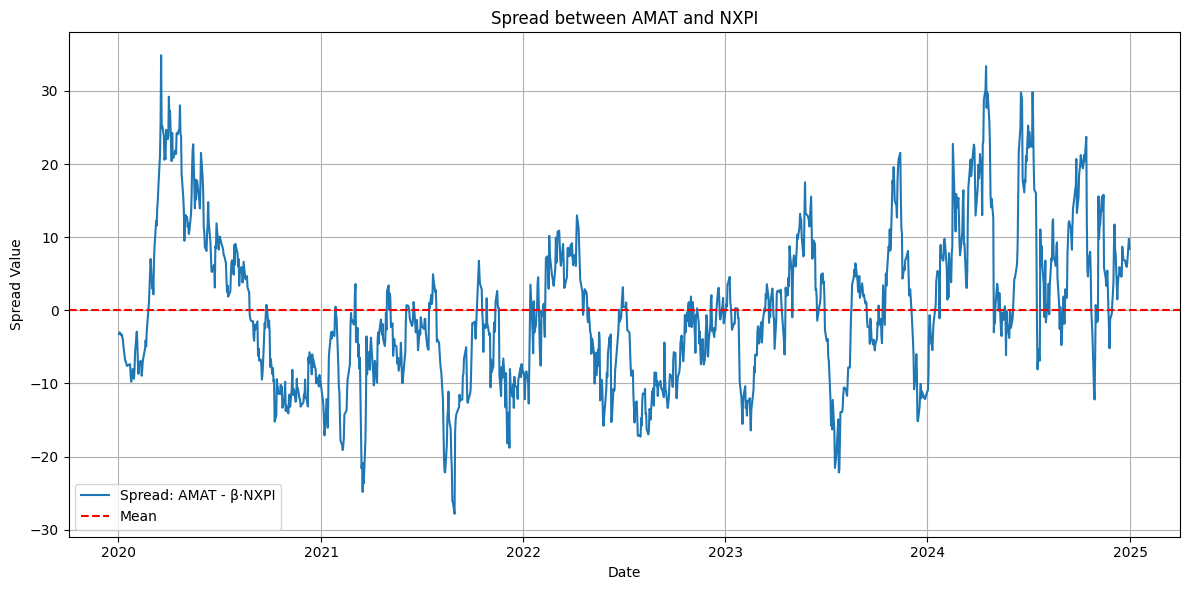

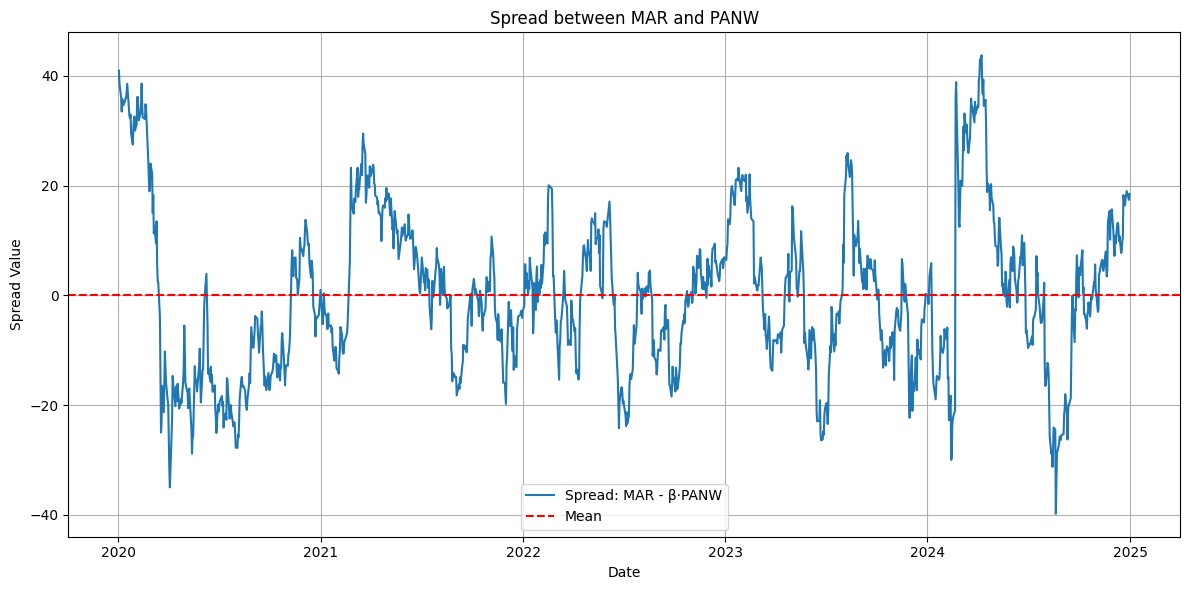

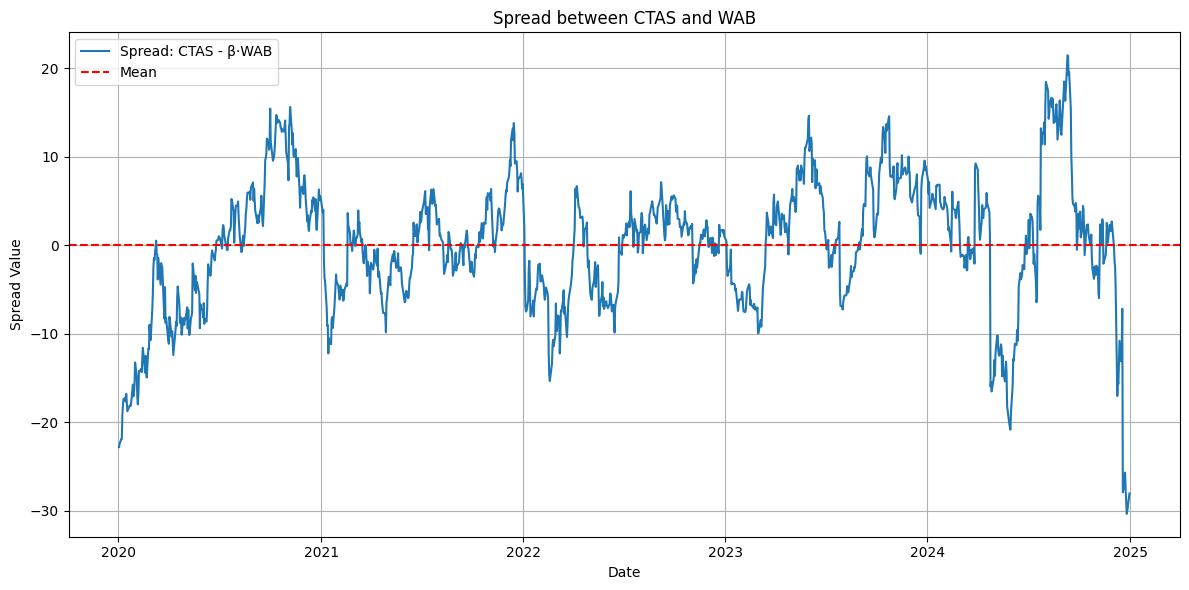

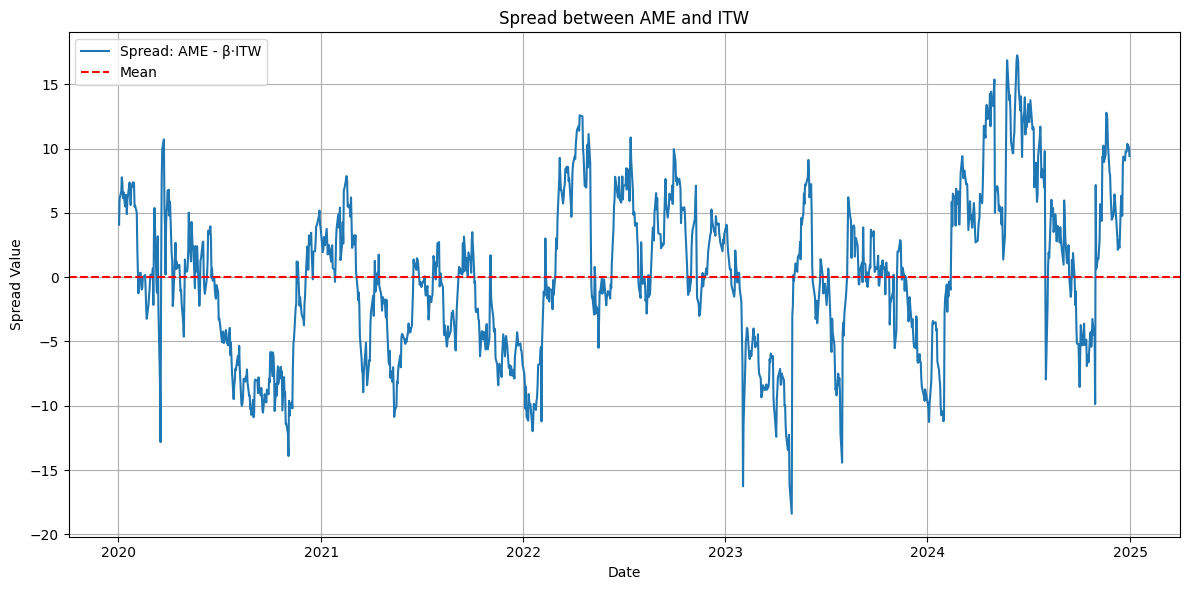

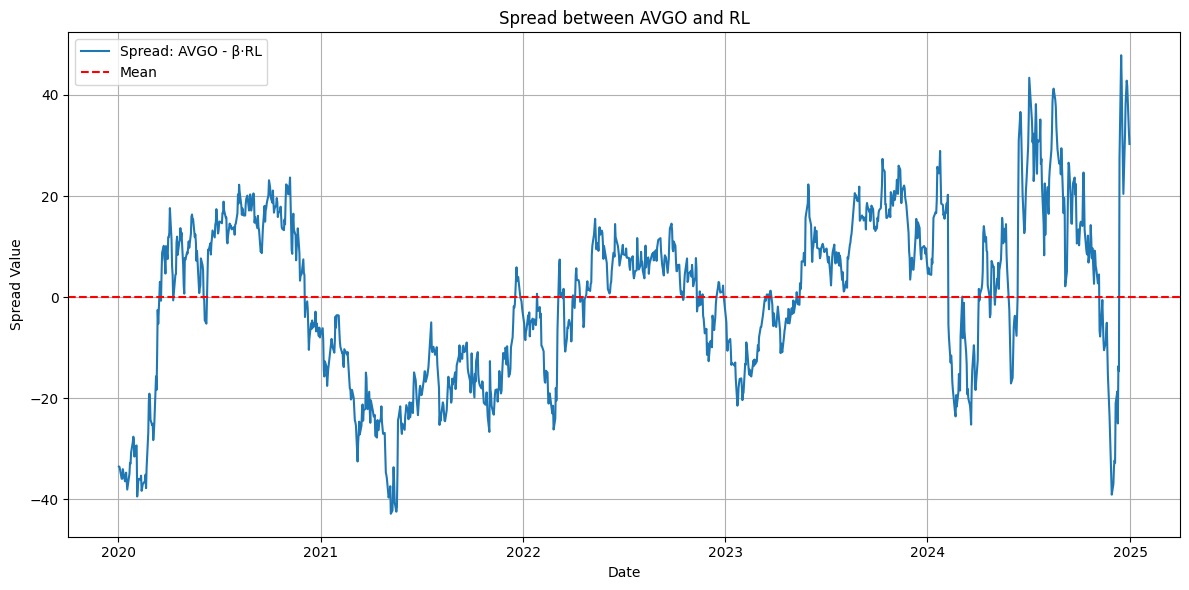

In [17]:
pairs = [
    ("AMAT", "NXPI"),
    ("MAR", "PANW"),
    ("CTAS", "WAB"),
    ("AME", "ITW"),
    ("AVGO", "RL")
]

for stock1, stock2 in pairs:
    Y = df[stock1]
    X = df[stock2]

    X_with_const = sm.add_constant(X)
    model = sm.OLS(Y, X_with_const).fit()
    spread = Y - model.predict(X_with_const)

    plt.figure(figsize=(12, 6))
    plt.plot(spread, label=f"Spread: {stock1} - β·{stock2}")
    plt.axhline(spread.mean(), color='r', linestyle='--', label='Mean')
    plt.title(f"Spread between {stock1} and {stock2}")
    plt.xlabel("Date")
    plt.ylabel("Spread Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

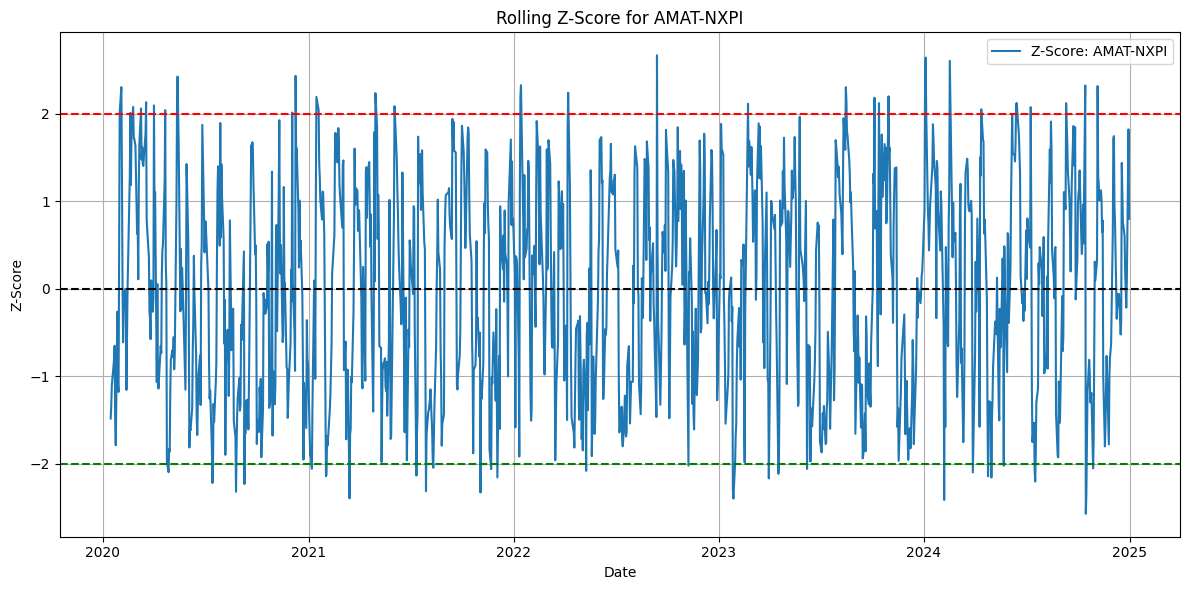

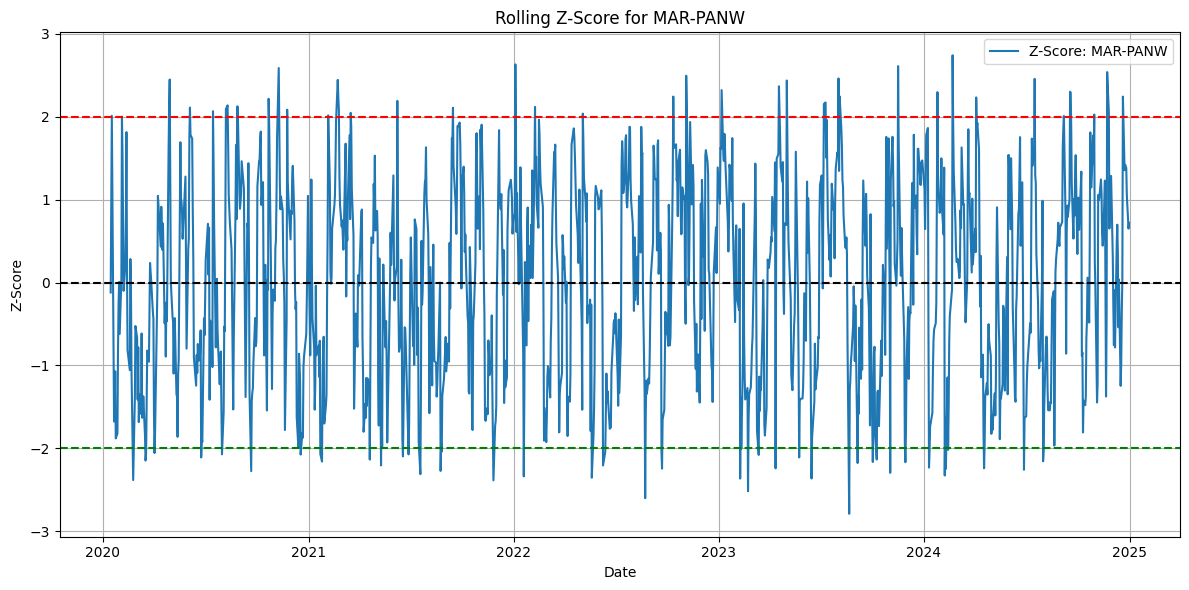

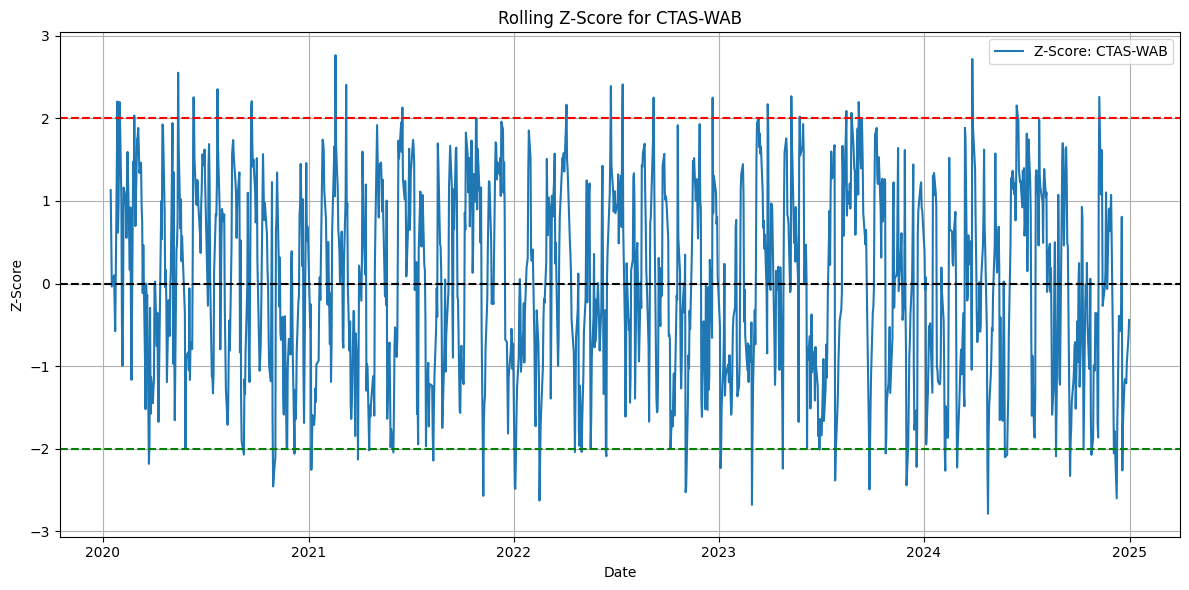

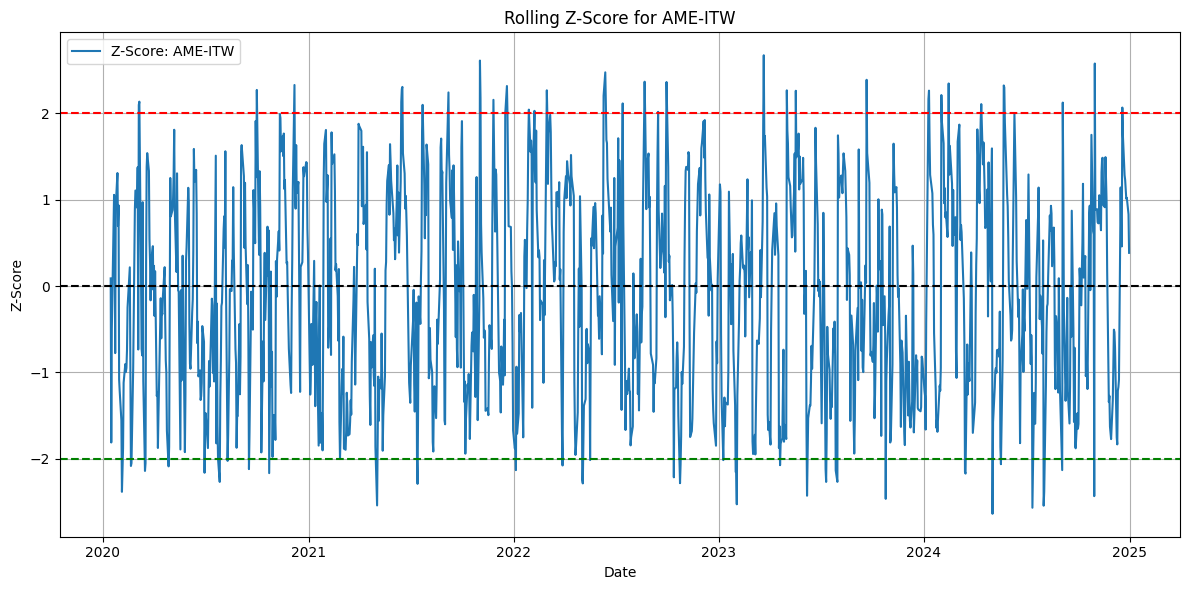

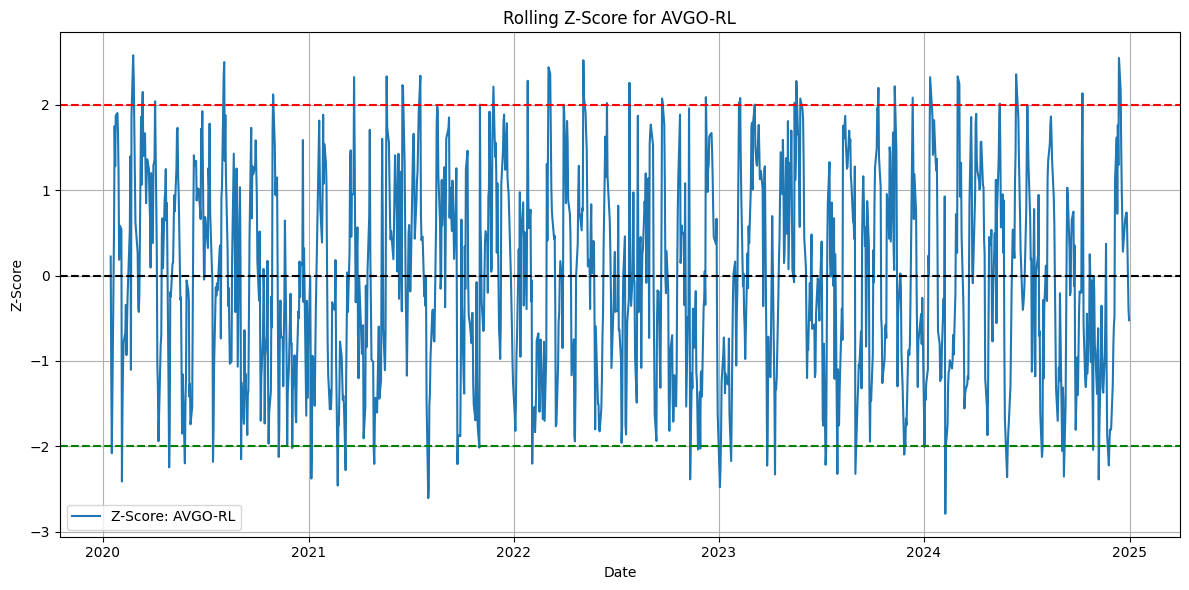

In [18]:
pairs = [
    ("AMAT", "NXPI"),
    ("MAR", "PANW"),
    ("CTAS", "WAB"),
    ("AME", "ITW"),
    ("AVGO", "RL")
]

window_size = 10

spreads = {}
zscores = {}

for stock1, stock2 in pairs:
    Y = df[stock1]
    X = df[stock2]

    X_const = sm.add_constant(X)
    model = sm.OLS(Y, X_const).fit()

    spread = Y - model.predict(X_const)
    spread_mean = spread.rolling(window=window_size).mean()
    spread_std = spread.rolling(window=window_size).std()
    zscore = (spread - spread_mean) / spread_std
    zscore = zscore.dropna()

    pair_name = f"{stock1}-{stock2}"
    spreads[pair_name] = spread
    zscores[pair_name] = zscore

    plt.figure(figsize=(12, 6))
    plt.plot(zscore, label=f"Z-Score: {pair_name}")
    plt.axhline(0, color='black', linestyle='--')
    plt.axhline(2, color='red', linestyle='--')
    plt.axhline(-2, color='green', linestyle='--')
    plt.title(f"Rolling Z-Score for {pair_name}")
    plt.xlabel("Date")
    plt.ylabel("Z-Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [19]:
first_valid_idx = zscore.first_valid_index()
zscore = zscore[first_valid_idx:]
zscore

Date
2020-01-15    0.224152
2020-01-16   -1.176712
2020-01-17   -2.079802
2020-01-21    0.590482
2020-01-22    1.752158
                ...   
2024-12-24    0.659463
2024-12-26    0.739295
2024-12-27    0.734943
2024-12-30   -0.390758
2024-12-31   -0.522514
Length: 1249, dtype: float64

In [20]:
for pair_name in zscores:
    z = zscores[pair_name]                       
    first_valid_idx = z.first_valid_index()      
    zscores[pair_name] = z[first_valid_idx:]     

In [21]:
for pair_name in zscores:
    print(f"\n{pair_name} z-score:")
    print(zscores[pair_name].head())


AMAT-NXPI z-score:
Date
2020-01-15   -1.485122
2020-01-16   -1.334341
2020-01-17   -1.103714
2020-01-21   -0.808661
2020-01-22   -0.652497
dtype: float64

MAR-PANW z-score:
Date
2020-01-15   -0.119645
2020-01-16    0.978189
2020-01-17    2.011021
2020-01-21   -1.675272
2020-01-22   -1.625602
dtype: float64

CTAS-WAB z-score:
Date
2020-01-15    1.131484
2020-01-16    0.535648
2020-01-17   -0.037016
2020-01-21    0.099065
2020-01-22   -0.221041
dtype: float64

AME-ITW z-score:
Date
2020-01-15    0.089283
2020-01-16   -1.811960
2020-01-17   -0.493440
2020-01-21    1.057077
2020-01-22    0.478623
dtype: float64

AVGO-RL z-score:
Date
2020-01-15    0.224152
2020-01-16   -1.176712
2020-01-17   -2.079802
2020-01-21    0.590482
2020-01-22    1.752158
dtype: float64


In [22]:
entry_threshold = 2.0
exit_threshold = 1.0

positions = {}

for pair_name, zscore in zscores.items():
    stock1_pos = pd.Series(data=0, index=zscore.index)
    stock2_pos = pd.Series(data=0, index=zscore.index)

    position = 'none'

    for i in range(1, len(zscore)):
        z = zscore.iloc[i]

        if position == 'none':
            if z < -entry_threshold:
                stock1_pos.iloc[i] = 1
                stock2_pos.iloc[i] = -1
                position = 'long'
            elif z > entry_threshold:
                stock1_pos.iloc[i] = -1
                stock2_pos.iloc[i] = 1
                position = 'short'

        elif position == 'long':
            if abs(z) < exit_threshold:
                position = 'none'
            else:
                stock1_pos.iloc[i] = 1
                stock2_pos.iloc[i] = -1

        elif position == 'short':
            if abs(z) < exit_threshold:
                position = 'none'
            else:
                stock1_pos.iloc[i] = -1
                stock2_pos.iloc[i] = 1

        if stock1_pos.iloc[i] == 0 and i > 0:
            stock1_pos.iloc[i] = stock1_pos.iloc[i - 1]
            stock2_pos.iloc[i] = stock2_pos.iloc[i - 1]

    positions[pair_name] = {
        'stock1': stock1_pos,
        'stock2': stock2_pos
    }

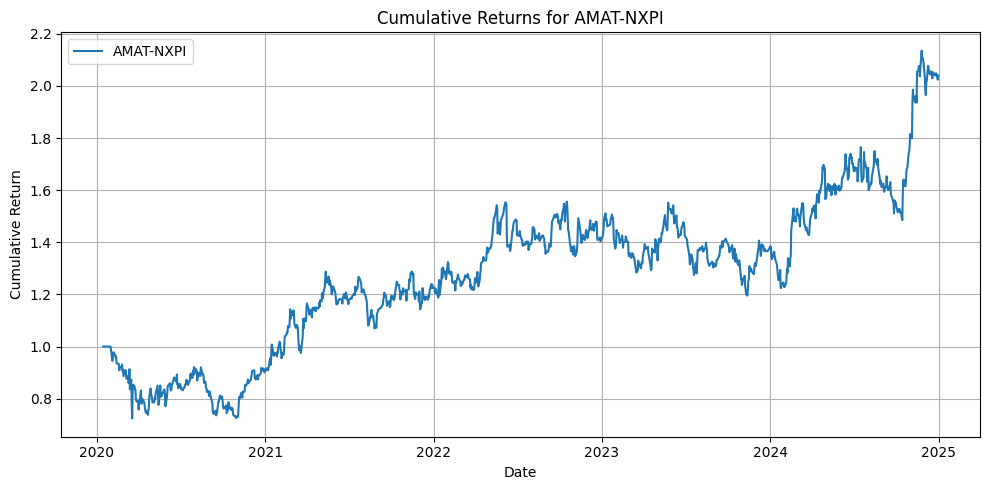

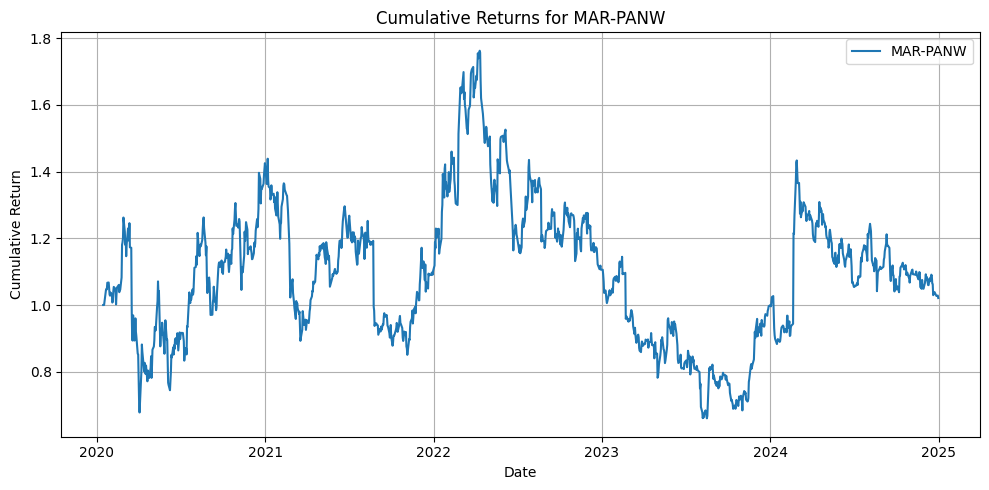

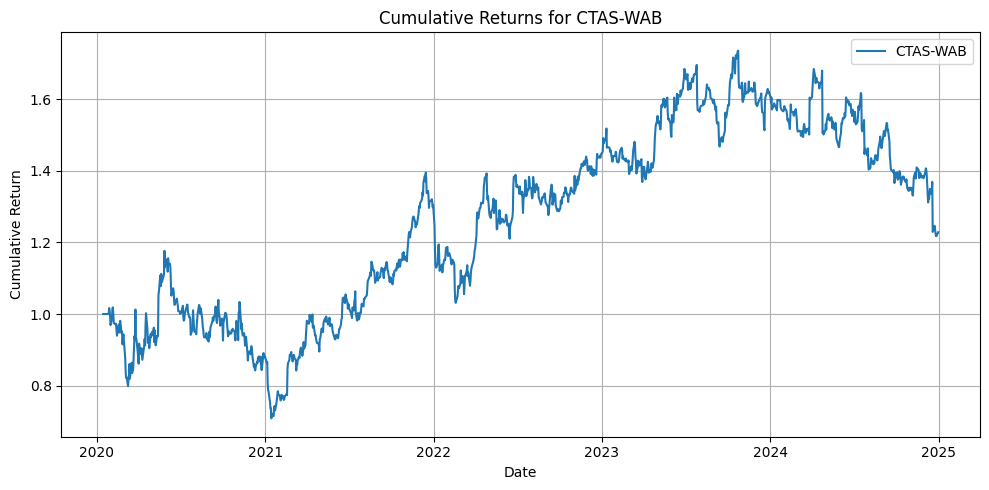

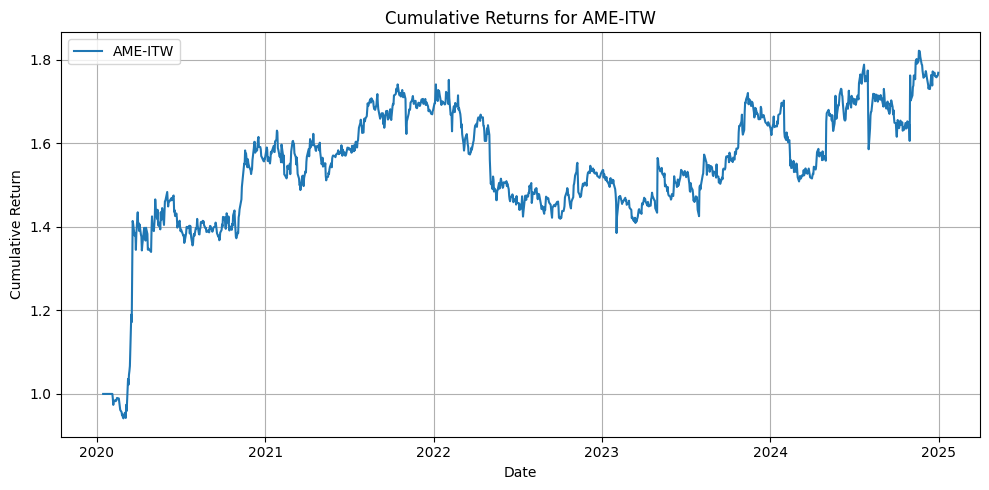

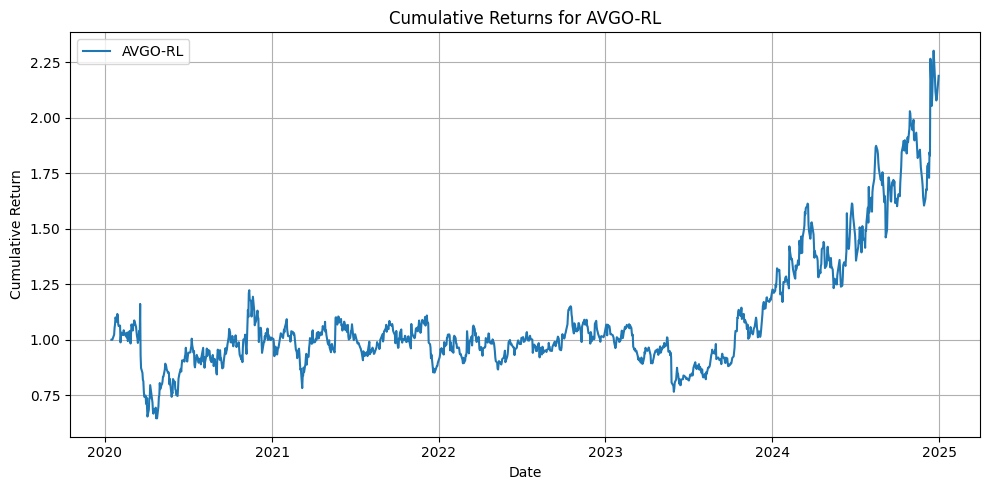

In [23]:
for pair_name, pos in positions.items():
    stock1, stock2 = pair_name.split("-")

    stock1_position = pos["stock1"]
    stock2_position = pos["stock2"]

    first_valid_idx = stock1_position.first_valid_index()
    price1 = df[stock1][first_valid_idx:]
    price2 = df[stock2][first_valid_idx:]

    stock1_returns = price1.pct_change() * stock1_position.shift(1)
    stock2_returns = price2.pct_change() * stock2_position.shift(1)

    total_returns = (stock1_returns + stock2_returns).fillna(0)

    cumulative_returns = (1 + total_returns).cumprod()

    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_returns, label=f"{pair_name}")
    plt.title(f"Cumulative Returns for {pair_name}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [24]:
spx_data = yf.download("^GSPC", start="2020-01-01", end="2025-01-01")

spx = spx_data["Close"]


spx_returns = spx.pct_change().fillna(0)

spx_cumulative = (1 + spx_returns).cumprod()

SPX_cum_return = spx_cumulative.iloc[-1]-1

SPX_cum_return

[*********************100%***********************]  1 of 1 completed


Ticker
^GSPC    0.805372
Name: 2024-12-31 00:00:00, dtype: float64

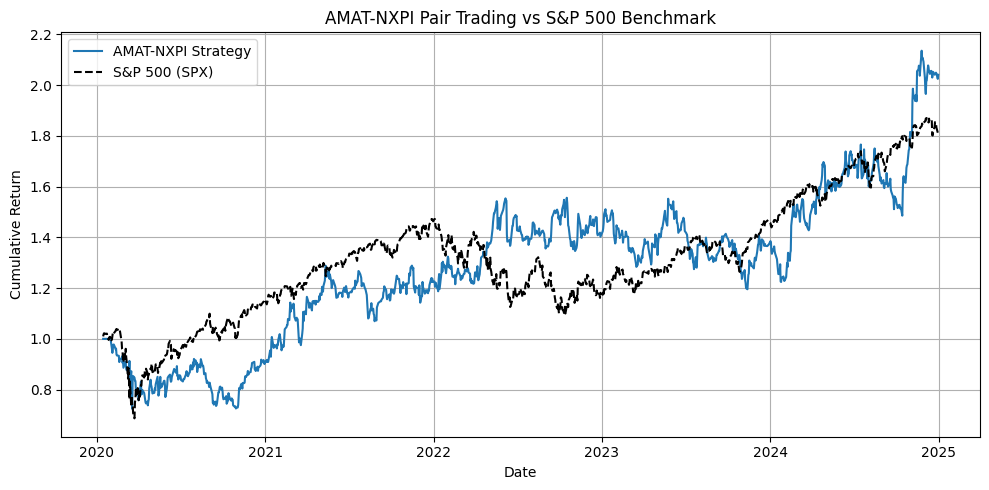

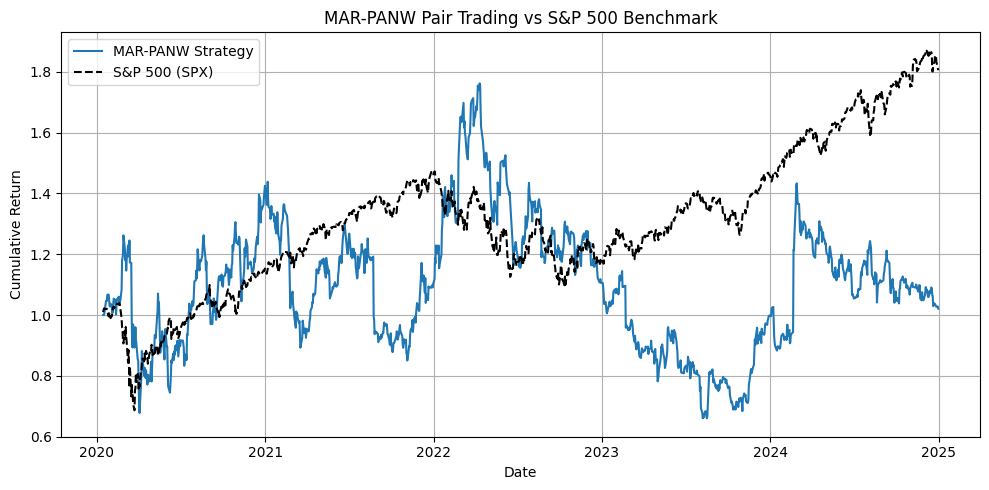

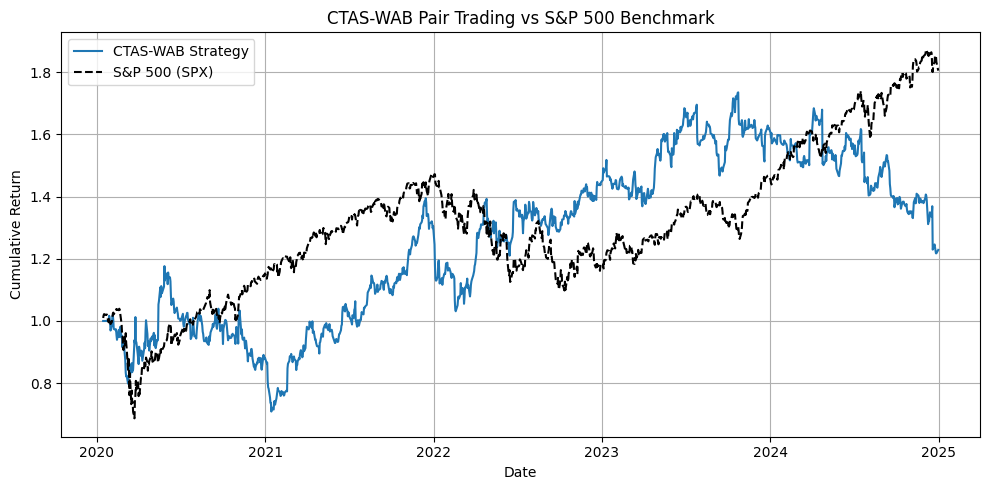

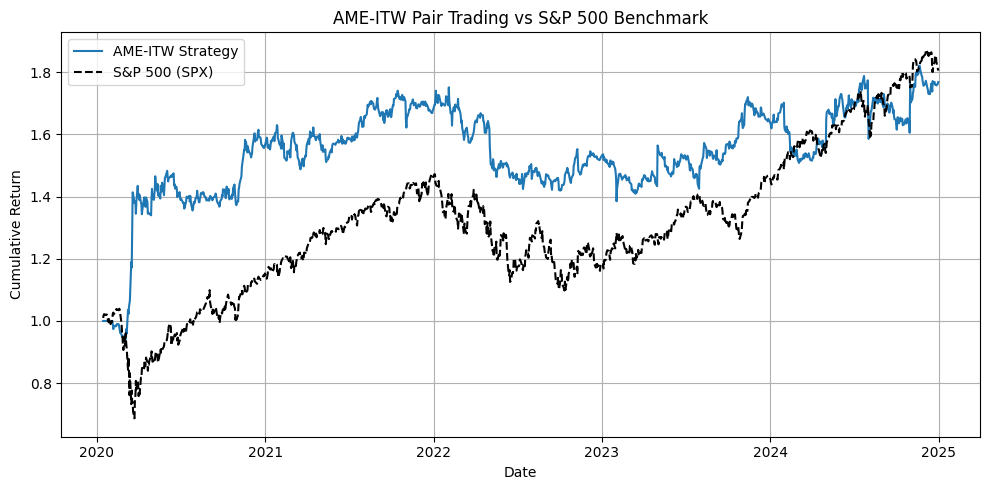

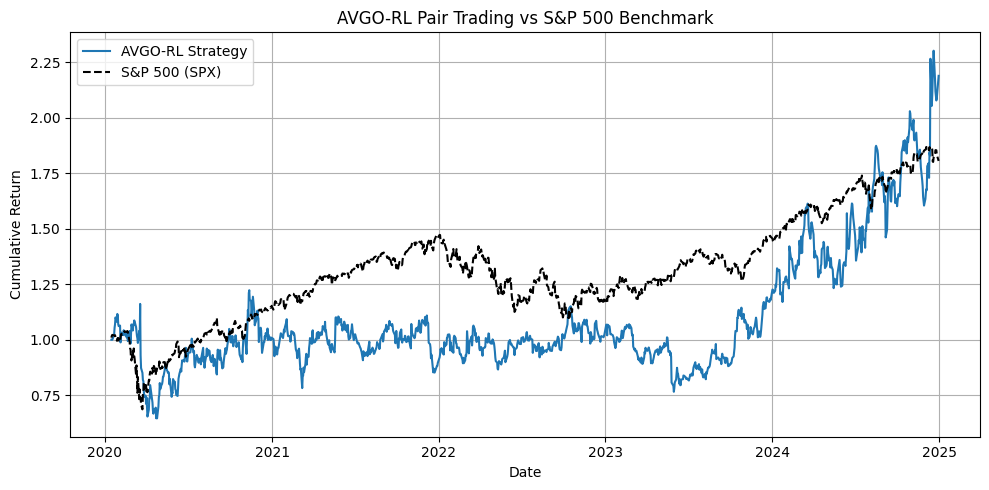

In [25]:
for pair_name, pos in positions.items():
    stock1, stock2 = pair_name.split("-")

    stock1_position = pos["stock1"]
    stock2_position = pos["stock2"]

    first_valid_idx = stock1_position.first_valid_index()
    
    price1 = df[stock1][first_valid_idx:]
    price2 = df[stock2][first_valid_idx:]
    spx_benchmark = spx_cumulative[first_valid_idx:]

    stock1_returns = price1.pct_change() * stock1_position.shift(1)
    stock2_returns = price2.pct_change() * stock2_position.shift(1)
    total_returns = (stock1_returns + stock2_returns).fillna(0)
    cumulative_returns = (1 + total_returns).cumprod()

    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_returns, label=f"{pair_name} Strategy")
    plt.plot(spx_benchmark, label="S&P 500 (SPX)", linestyle='--', color='black')
    plt.title(f"{pair_name} Pair Trading vs S&P 500 Benchmark")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [26]:
original_cumulative_returns = {}

for pair_name, pos in positions.items():
    stock1, stock2 = pair_name.split("-")

    stock1_position = pos["stock1"]
    stock2_position = pos["stock2"]

    first_valid_idx = stock1_position.first_valid_index()
    price1 = df[stock1][first_valid_idx:]
    price2 = df[stock2][first_valid_idx:]

    stock1_returns = price1.pct_change() * stock1_position.shift(1)
    stock2_returns = price2.pct_change() * stock2_position.shift(1)
    total_returns = (stock1_returns + stock2_returns).fillna(0)

    cumulative_returns = (1 + total_returns).cumprod()
    original_cumulative_returns[pair_name] = cumulative_returns.iloc[-1]-1

print("Original Pair Trading Cumulative Returns (No ML):")
for pair, value in original_cumulative_returns.items():
    print(f"{pair}: {value:.6f}")


Original Pair Trading Cumulative Returns (No ML):
AMAT-NXPI: 1.040405
MAR-PANW: 0.020950
CTAS-WAB: 0.228621
AME-ITW: 0.768655
AVGO-RL: 1.188444


In [27]:
from scipy.stats import norm

def annualize_rets(r, periods_per_year):
    compounded_growth = (1 + r).prod()
    n_periods = r.shape[0]
    return compounded_growth ** (periods_per_year / n_periods) - 1

def annualize_vol(r, periods_per_year):
    return r.std() * (periods_per_year ** 0.5)

def sharpe_ratio(r, rf_series, periods_per_year):
    aligned_rf = rf_series.loc[r.index]
    excess_ret = r - aligned_rf
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret / ann_vol

def skewness(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r ** 3).mean()
    return exp / sigma_r ** 3

def kurtosis(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r ** 4).mean()
    return exp / sigma_r ** 4

def var_gaussian(r, level=5, modified=False):
    z = norm.ppf(level / 100)
    if modified:
        s = skewness(r)
        k = kurtosis(r)
        z = (
            z
            + (z ** 2 - 1) * s / 6
            + (z ** 3 - 3 * z) * (k - 3) / 24
            - (2 * z ** 3 - 5 * z) * (s ** 2) / 36
        )
    return -(r.mean() + z * r.std(ddof=0))

def var_historic(r, level=5):
    if isinstance(r, pd.DataFrame): 
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")

def cvar_historic(r, level=5):
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

def drawdown(return_series: pd.Series):
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

def summary_stats(r, riskfree_rate):
    periods_per_year = 252
    stats = {
        "Annualized Return": pd.Series(r.aggregate(annualize_rets, periods_per_year=periods_per_year)),
        "Annualized Volatility": pd.Series(r.aggregate(annualize_vol, periods_per_year=periods_per_year)),
        "Sharpe Ratio": pd.Series({col: sharpe_ratio(r[col], rf_series=riskfree_rate, periods_per_year=periods_per_year)
                                   for col in r.columns}),
        "Skewness": pd.Series(r.aggregate(skewness)),
        "Kurtosis": pd.Series(r.aggregate(kurtosis)),
        "Gaussian VaR (5%)": pd.Series(r.aggregate(var_gaussian, modified=False)),
        "Cornish–Fisher VaR (5%)": pd.Series(r.aggregate(var_gaussian, modified=True)),
        "CVaR (5%)": pd.Series(r.aggregate(cvar_historic)),
        "Max Drawdown": pd.Series(r.aggregate(lambda x: drawdown(x).Drawdown.min())),
    }
    return pd.DataFrame(stats)


In [28]:
returns_all_pairs = {}

for pair_name, pos in positions.items():
    stock1, stock2 = pair_name.split("-")
    
    stock1_pos = pos['stock1']
    stock2_pos = pos['stock2']
    
    first_valid_idx = stock1_pos.first_valid_index()
    price1 = df[stock1][first_valid_idx:]
    price2 = df[stock2][first_valid_idx:]

    stock1_returns = price1.pct_change() * stock1_pos.shift(1)
    stock2_returns = price2.pct_change() * stock2_pos.shift(1)
    
    total_returns = (stock1_returns + stock2_returns).fillna(0)
    returns_all_pairs[pair_name] = total_returns

returns_df = pd.DataFrame(returns_all_pairs)


In [29]:
import pandas_datareader.data as web
rf_daily_raw = web.DataReader('DTB4WK', 'fred', start='2020-01-01', end='2025-01-01')
rf_daily = rf_daily_raw.dropna()
rf_daily.columns = ['RF']
rf_daily['Daily_RF'] = ((1 + rf_daily['RF'] / 100) ** (1/252)) - 1
aligned_rf = rf_daily['Daily_RF'].reindex(returns_df.index).fillna(method='ffill')

In [30]:
spx_data = yf.download("^GSPC", start="2020-01-01")["Close"]
spx_returns = spx_data.pct_change().dropna()
spx_returns = spx_returns.loc[returns_df.index]  
returns_df["SPX"] = spx_returns
summary = summary_stats(returns_df, riskfree_rate=aligned_rf)
summary

[*********************100%***********************]  1 of 1 completed


,Annualized Return,Annualized Volatility,Sharpe Ratio,Skewness,Kurtosis,Gaussian VaR (5%),Cornish–Fisher VaR (5%),CVaR (5%),Max Drawdown
AMAT-NXPI,0.154752,0.301782,0.424069,0.239174,9.116515,0.030506,0.026848,0.041681,-0.275602
MAR-PANW,0.004192,0.478455,-0.039943,0.460228,13.230971,0.049087,0.038806,0.068117,-0.625222
CTAS-WAB,0.042416,0.289803,0.062897,0.195152,9.475609,0.029685,0.026275,0.042850,-0.397612
AME-ITW,0.121928,0.193309,0.496141,2.377271,24.004662,0.019492,0.004815,0.022718,-0.209249
AVGO-RL,0.171187,0.477376,0.301740,0.613213,11.120140,0.048369,0.037991,0.064239,-0.443585
SPX,0.124831,0.213992,0.461487,-0.511426,15.994304,0.021606,0.019965,0.032378,-0.339250


# Feature engineering

In [32]:
pairs = [("AMAT", "NXPI"), ("MAR", "PANW"), ("CTAS", "WAB"), ("AME", "ITW"), ("AVGO", "RL")]

features_dict = {}

for stock1, stock2 in pairs:
    # Log returns
    asset1_returns = np.log(df[stock1]).diff()
    asset2_returns = np.log(df[stock2]).diff()
    
    # Estimate spread using OLS (stock1 ~ stock2)
    X = sm.add_constant(df[stock2])
    model = sm.OLS(df[stock1], X).fit()
    spread = df[stock1] - model.predict(X)

    # 5-day moving average of spread
    spread_ma5 = spread.rolling(window=5).mean()

    # 20-day rolling volatility of each asset
    asset1_volatility = asset1_returns.rolling(window=20).std()
    asset2_volatility = asset2_returns.rolling(window=20).std()

    # Combining features into DataFrame
    features_df = pd.DataFrame({
        f"{stock1}_ret": asset1_returns,
        f"{stock2}_ret": asset2_returns,
        "spread_ma5": spread_ma5,
        f"{stock1}_vol20": asset1_volatility,
        f"{stock2}_vol20": asset2_volatility
    })

    # Drop rows with any NaNs 
    features_df = features_df.dropna()

In [33]:
pairs = [("AMAT", "NXPI"), ("MAR", "PANW"), ("CTAS", "WAB"), ("AME", "ITW"), ("AVGO", "RL")]

X = {}
y = {}

for stock1, stock2 in pairs:
    asset1_returns = np.log(df[stock1]).diff()
    asset2_returns = np.log(df[stock2]).diff()
    
    spread_ma5 = spread.rolling(window=5).mean()
    asset1_volatility = asset1_returns.rolling(window=20).std()
    asset2_volatility = asset2_returns.rolling(window=20).std()
    
    X_features = pd.DataFrame({
        'Asset1Returns': asset1_returns,
        'Asset2Returns': asset2_returns,
        'SpreadMA5': spread_ma5,
        'Asset1Volatility': asset1_volatility,
        'Asset2Volatility': asset2_volatility
    }).fillna(0)
    
    pair_name = f"{stock1}_{stock2}"
    X[pair_name] = X_features
    y[pair_name] = spread

In [34]:
train_X = {}
test_X = {}
train_y = {}
test_y = {}

for pair in X.keys():
    X_pair = X[pair]
    y_pair = y[pair]

    train_size = int(len(X_pair) * 0.8)
    
    train_X[pair] = X_pair.iloc[:train_size]
    test_X[pair] = X_pair.iloc[train_size:]
    
    train_y[pair] = y_pair.iloc[:train_size]
    test_y[pair] = y_pair.iloc[train_size:]

In [35]:
def score_fn_all_pairs(models_dict, type="non_neural_net", custom_predict_fn=None):
    final_returns = {}

    for pair in test_X:
        model = models_dict[pair]
        X_test = test_X[pair]
        y_test = test_y[pair]
        
        # Generating the predicted spread
        if custom_predict_fn:
            test_pred = custom_predict_fn(pair, X_test)
            pred_series = pd.Series(test_pred, index=y_test.index)
        elif type == "non_neural_net":
            test_pred = model.predict(X_test)
            pred_series = pd.Series(test_pred, index=y_test.index)
        else:
            test_pred = model(torch.Tensor(X_test.values)).detach().numpy().flatten()
            pred_series = pd.Series(test_pred, index=y_test.index)
        
        # Calculating z-score of the actual and predicted spread
        residual = y_test - pred_series             # point-by-point prediction error
        zscore   = (residual - residual.mean()) / residual.std()
        
        # Entry and exit thresholds
        entry_threshold = 2.0
        exit_threshold = 1.0

        # Initializing positions
        stock1_position = pd.Series(data=0, index=zscore.index)
        stock2_position = pd.Series(data=0, index=zscore.index)

        # Trading logic
        for i in range(1, len(zscore)):
            if zscore[i] < -entry_threshold and stock1_position[i-1] == 0:
                stock1_position[i] = 1
                stock2_position[i] = -1
            elif zscore[i] > entry_threshold and stock2_position[i-1] == 0:
                stock1_position[i] = -1
                stock2_position[i] = 1
            elif abs(zscore[i]) < exit_threshold:
                stock1_position[i] = 0
                stock2_position[i] = 0
            else:
                stock1_position[i] = stock1_position[i-1]
                stock2_position[i] = stock2_position[i-1]

        # Calculating strategy returns
        stock1_returns = (np.exp(X_test['Asset1Returns']) * stock1_position.shift(1)).fillna(0)
        stock2_returns = (np.exp(X_test['Asset2Returns']) * stock2_position.shift(1)).fillna(0)
        total_returns = stock1_returns + stock2_returns
        cumulative_returns = (1 + total_returns).cumprod()

        # Saving final value
        final_returns[pair] = cumulative_returns[-1]

    return final_returns

# ML METHOD ONE: SVM

In [37]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

rmse_results = {}
svm_models = {}

for pair in train_X.keys():
    print(f"--- {pair} ---")
    
    X_train = train_X[pair]
    y_train = train_y[pair]
    X_test = test_X[pair]
    y_test = test_y[pair]

    svm_model = SVR(kernel='linear')
    svm_model.fit(X_train, y_train)

    train_pred = svm_model.predict(X_train)
    test_pred = svm_model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))

    print("Train RMSE:", rmse_train)
    print("Test RMSE:", rmse_test)

    rmse_results[pair] = {'Train_RMSE': rmse_train, 'Test_RMSE': rmse_test}
    svm_models[pair] = svm_model

--- AMAT_NXPI ---
Train RMSE: 3.6216254872763725
Test RMSE: 7.284047553200957
--- MAR_PANW ---
Train RMSE: 3.6051978604204873
Test RMSE: 7.273025029826937
--- CTAS_WAB ---
Train RMSE: 3.606540034882476
Test RMSE: 7.2705157843669275
--- AME_ITW ---
Train RMSE: 3.6145334607868693
Test RMSE: 7.269947357742277
--- AVGO_RL ---
Train RMSE: 3.4731563700521457
Test RMSE: 7.182669801256867


In [38]:
score_fn_all_pairs(svm_models)

{'AMAT_NXPI': 0.9837499505433404,
 'MAR_PANW': 0.8566537103683978,
 'CTAS_WAB': 0.9773709054785528,
 'AME_ITW': 1.0722925678981625,
 'AVGO_RL': 0.951405289565147}

# ML METHOD TWO: Random Forest


In [40]:
from sklearn.ensemble import RandomForestRegressor

rf_rmse_results = {}
rf_trained_models = {}

for pair in train_X.keys():
    print(f"--- {pair} ---")

    X_train = train_X[pair]
    y_train = train_y[pair]
    X_test = test_X[pair]
    y_test = test_y[pair]

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    train_pred = rf_model.predict(X_train)
    test_pred = rf_model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))

    print("Train RMSE:", rmse_train)
    print("Test RMSE:", rmse_test)

    rf_rmse_results[pair] = {'Train_RMSE': rmse_train, 'Test_RMSE': rmse_test}
    rf_trained_models[pair] = rf_model

--- AMAT_NXPI ---
Train RMSE: 1.143447978064735
Test RMSE: 8.118550380682635
--- MAR_PANW ---
Train RMSE: 1.0860066224117375
Test RMSE: 8.355130958436213
--- CTAS_WAB ---
Train RMSE: 1.1035560637840947
Test RMSE: 8.283747597328388
--- AME_ITW ---
Train RMSE: 1.107457308595011
Test RMSE: 8.274127325213104
--- AVGO_RL ---
Train RMSE: 0.8923614246028958
Test RMSE: 7.767067032382419


In [41]:
score_fn_all_pairs(rf_trained_models)

{'AMAT_NXPI': 1.0589085941600407,
 'MAR_PANW': 0.8868277203068864,
 'CTAS_WAB': 1.0552231837394377,
 'AME_ITW': 1.0728993898871637,
 'AVGO_RL': 1.2455139221845928}

# ML METHOD THREE:Neural Networks

In [43]:
import torch
train_X_ts = {}
train_y_ts = {}
test_X_ts = {}
test_y_ts = {}

for pair in train_X:
    train_X_ts[pair] = torch.Tensor(train_X[pair].values)
    train_y_ts[pair] = torch.Tensor(train_y[pair].values).view(-1, 1)
    test_X_ts[pair] = torch.Tensor(test_X[pair].values)
    test_y_ts[pair] = torch.Tensor(test_y[pair].values).view(-1, 1)

In [44]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


In [45]:
from torchsummary import summary

nn_models = {}  

for pair in train_X.keys():
    input_dim = train_X[pair].shape[1]
    model = Net(input_dim)
    print(f"--- Summary for {pair} ---")
    summary(model, input_size=(1, input_dim))
    nn_models[pair] = model

--- Summary for AMAT_NXPI ---
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]             384
              ReLU-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 32]           2,080
              ReLU-4                [-1, 1, 32]               0
            Linear-5                 [-1, 1, 1]              33
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
--- Summary for MAR_PANW ---
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]   

In [46]:
nn_rmse_results = {}
nn_models = {}

for pair in train_X_ts.keys():
    print(f"--- Training {pair} ---")
    
    X_train = train_X_ts[pair]
    y_train = train_y_ts[pair]
    X_test = test_X_ts[pair]
    y_test = test_y_ts[pair]
    
    input_dim = X_train.shape[1]

    # Creating model and optimizer
    nn_model = Net(input_dim)  
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)

    for epoch in range(100):
        nn_model.train()
        optimizer.zero_grad()
        outputs = nn_model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    nn_model.eval()
    train_pred = nn_model(X_train).detach().numpy()
    test_pred = nn_model(X_test).detach().numpy()

    rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))

    print("Train RMSE:", rmse_train)
    print("Test RMSE:", rmse_test)

    nn_models[pair] = nn_model
    nn_rmse_results[pair] = {'Train_RMSE': rmse_train, 'Test_RMSE': rmse_test}

--- Training AMAT_NXPI ---
Epoch 0, Loss: 263.2097
Epoch 10, Loss: 218.7249
Epoch 20, Loss: 174.5934
Epoch 30, Loss: 125.2774
Epoch 40, Loss: 77.8067
Epoch 50, Loss: 43.1647
Epoch 60, Loss: 27.0457
Epoch 70, Loss: 19.9780
Epoch 80, Loss: 14.8200
Epoch 90, Loss: 13.1078
Train RMSE: 3.623495
Test RMSE: 7.265712
--- Training MAR_PANW ---
Epoch 0, Loss: 248.8471
Epoch 10, Loss: 211.2103
Epoch 20, Loss: 175.3713
Epoch 30, Loss: 134.9075
Epoch 40, Loss: 93.4708
Epoch 50, Loss: 59.5363
Epoch 60, Loss: 40.7377
Epoch 70, Loss: 31.4986
Epoch 80, Loss: 22.6962
Epoch 90, Loss: 16.4728
Train RMSE: 3.7104366
Test RMSE: 7.4523787
--- Training CTAS_WAB ---
Epoch 0, Loss: 246.5021
Epoch 10, Loss: 188.0481
Epoch 20, Loss: 135.6834
Epoch 30, Loss: 87.8315
Epoch 40, Loss: 52.6417
Epoch 50, Loss: 34.7493
Epoch 60, Loss: 25.4735
Epoch 70, Loss: 17.4350
Epoch 80, Loss: 13.7356
Epoch 90, Loss: 13.2097
Train RMSE: 3.6291294
Test RMSE: 7.2647567
--- Training AME_ITW ---
Epoch 0, Loss: 264.5782
Epoch 10, Loss: 2

In [47]:
score_fn_all_pairs(nn_models, type="nn")

{'AMAT_NXPI': 1.0095997661338365,
 'MAR_PANW': 0.8851732737670213,
 'CTAS_WAB': 0.9840130095457654,
 'AME_ITW': 1.0722925678981625,
 'AVGO_RL': 0.951405289565147}

# ML METHOD FOUR: Ensemble Models

In [49]:
from sklearn.linear_model import LinearRegression

ensemble_rmse_results = {}
ensemble_models = {}

for pair in train_X.keys():
    print(f"--- Training Ensemble for {pair} ---")

    svm_pred_train = svm_models[pair].predict(train_X[pair])
    rf_pred_train = rf_trained_models[pair].predict(train_X[pair])
    nn_pred_train = nn_models[pair](torch.Tensor(train_X[pair].values)).detach().numpy().flatten()

    X_meta_train = np.column_stack([svm_pred_train, rf_pred_train, nn_pred_train])
    y_meta_train = train_y[pair]

    meta_model = LinearRegression()
    meta_model.fit(X_meta_train, y_meta_train)

    ensemble_models[pair] = meta_model

    svm_pred_test = svm_models[pair].predict(test_X[pair])
    rf_pred_test = rf_trained_models[pair].predict(test_X[pair])
    nn_pred_test = nn_models[pair](torch.Tensor(test_X[pair].values)).detach().numpy().flatten()
    X_meta_test = np.column_stack([svm_pred_test, rf_pred_test, nn_pred_test])
    y_meta_test = test_y[pair]
    ensemble_pred_test = meta_model.predict(X_meta_test)

    rmse_test = np.sqrt(mean_squared_error(y_meta_test, ensemble_pred_test))
    print("Test RMSE:", rmse_test)

    ensemble_rmse_results[pair] = rmse_test

--- Training Ensemble for AMAT_NXPI ---
Test RMSE: 8.570515276060124
--- Training Ensemble for MAR_PANW ---
Test RMSE: 8.832387497863747
--- Training Ensemble for CTAS_WAB ---
Test RMSE: 8.70445383756788
--- Training Ensemble for AME_ITW ---
Test RMSE: 8.673087049517315
--- Training Ensemble for AVGO_RL ---
Test RMSE: 7.975177441749356


In [50]:
def ensemble_predict_fn(pair, X_test_pair):
    svm_pred = svm_models[pair].predict(X_test_pair)
    rf_pred = rf_trained_models[pair].predict(X_test_pair)
    nn_pred = nn_models[pair](torch.Tensor(X_test_pair.values)).detach().numpy().flatten()
    stacked = np.column_stack([svm_pred, rf_pred, nn_pred])
    return ensemble_models[pair].predict(stacked)

In [51]:
score_fn_all_pairs(ensemble_models, custom_predict_fn=ensemble_predict_fn)

{'AMAT_NXPI': 1.0704903495415765,
 'MAR_PANW': 0.8660088428082485,
 'CTAS_WAB': 1.0993034667585297,
 'AME_ITW': 1.067162286731907,
 'AVGO_RL': 1.305840623225127}

In [52]:
score_fn_all_pairs(nn_models, type="nn")

{'AMAT_NXPI': 1.0095997661338365,
 'MAR_PANW': 0.8851732737670213,
 'CTAS_WAB': 0.9840130095457654,
 'AME_ITW': 1.0722925678981625,
 'AVGO_RL': 0.951405289565147}

In [53]:
score_fn_all_pairs(svm_models)


{'AMAT_NXPI': 0.9837499505433404,
 'MAR_PANW': 0.8566537103683978,
 'CTAS_WAB': 0.9773709054785528,
 'AME_ITW': 1.0722925678981625,
 'AVGO_RL': 0.951405289565147}

In [54]:
score_fn_all_pairs(rf_trained_models)

{'AMAT_NXPI': 1.0589085941600407,
 'MAR_PANW': 0.8868277203068864,
 'CTAS_WAB': 1.0552231837394377,
 'AME_ITW': 1.0728993898871637,
 'AVGO_RL': 1.2455139221845928}

<Figure size 1400x800 with 0 Axes>

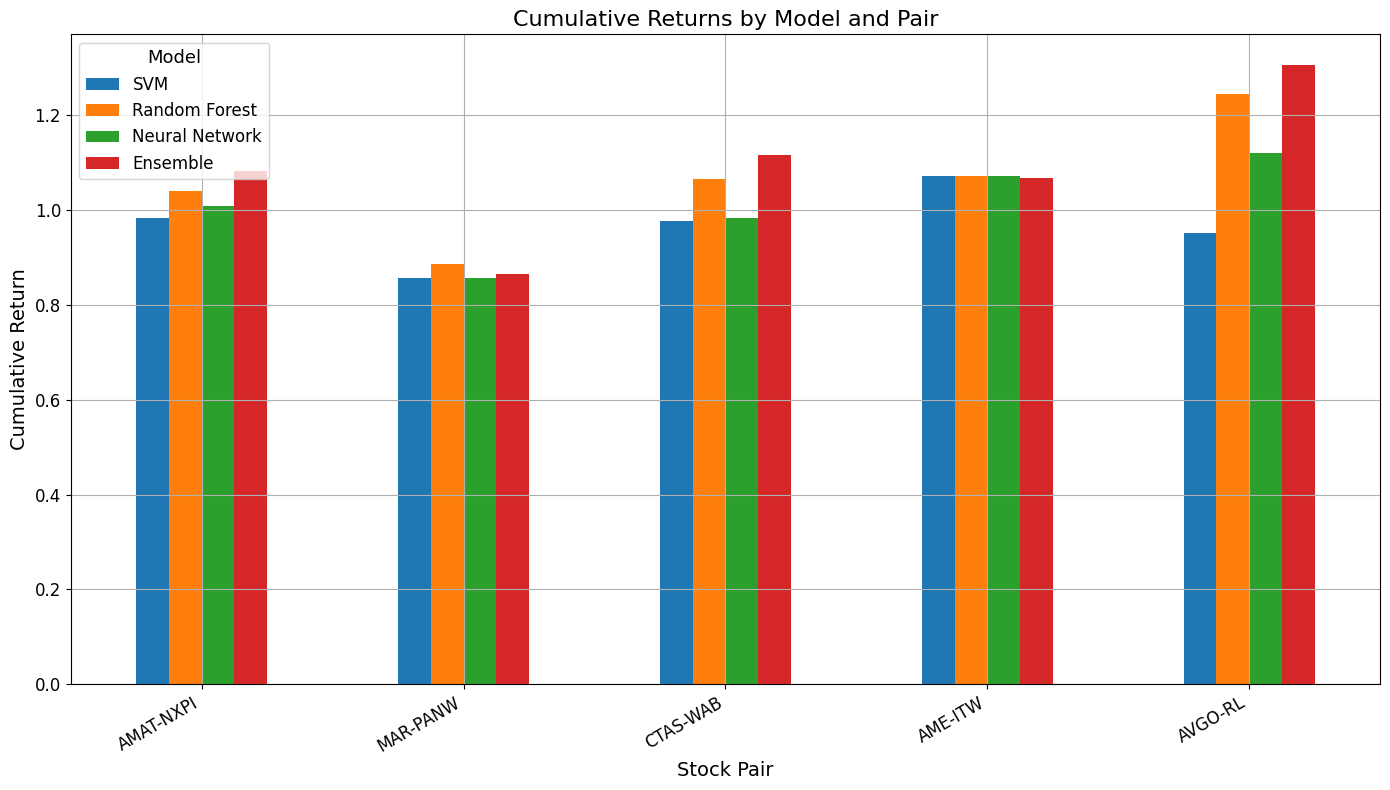

In [55]:
svm_final_returns = {
    'AMAT-NXPI': 0.983749714276333,
    'MAR-PANW': 0.8566537683701595,
    'CTAS-WAB': 0.977307102388459,
    'AME-ITW': 1.0722923142974183,
    'AVGO-RL': 0.951045573251993
}

rf_final_returns = {
    'AMAT-NXPI': 1.0409087371678327,
    'MAR-PANW': 0.8868257328531866,
    'CTAS-WAB': 1.065223366718337,
    'AME-ITW': 1.072899113910778,
    'AVGO-RL': 1.2455143256416723
}

nn_final_returns = {
    'AMAT-NXPI': 1.0095993721682501,
    'MAR-PANW': 0.8566537683701595,
    'CTAS-WAB': 0.9840129976479329,
    'AME-ITW': 1.0722923142974183,
    'AVGO-RL': 1.1200663082809055
}

ensemble_final_returns = {
    'AMAT-NXPI': 1.082554131279376,
    'MAR-PANW': 0.8660085983638453,
    'CTAS-WAB': 1.115809489888612,
    'AME-ITW': 1.067162018409572,
    'AVGO-RL': 1.3058410707033614
}

returns_df = pd.DataFrame({
    'SVM': svm_final_returns,
    'Random Forest': rf_final_returns,
    'Neural Network': nn_final_returns,
    'Ensemble': ensemble_final_returns
})

plt.figure(figsize=(14, 8)) 
returns_df.plot(kind='bar', figsize=(14, 8)) 

plt.title("Cumulative Returns by Model and Pair", fontsize=16)
plt.ylabel("Cumulative Return", fontsize=14)
plt.xlabel("Stock Pair", fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Model', fontsize=12, title_fontsize=13)
plt.show()